In [38]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
FS_Artificiality_Feature_Coefficients_LR = pd.read_csv('FS_Artificiality_Feature_Coefficients_LR.csv')
FS_Artificiality_Feature_Coefficients_SVC = pd.read_csv('FS_Artificiality_Feature_Coefficients_SVC.csv')
FS_Expressiveness_Feature_Coefficients_LR = pd.read_csv('FS_Expressiveness_Feature_Coefficients_LR.csv')
FS_Expressiveness_Feature_Coefficients_SVC = pd.read_csv('FS_Expressiveness_Feature_Coefficients_SVC.csv')
FSFE_Artificiality_Feature_Coefficients_LR = pd.read_csv('FSFE_Artificiality_Feature_Coefficients_LR.csv')
FSFE_Artificiality_Feature_Coefficients_SVC = pd.read_csv('FSFE_Artificiality_Feature_Coefficients_SVC.csv')
FSFE_Expressiveness_Feature_Coefficients_LR = pd.read_csv('FSFE_Expressiveness_Feature_Coefficients_LR.csv')
FSFE_Expressiveness_Feature_Coefficients_SVC = pd.read_csv('FSFE_Expressiveness_Feature_Coefficients_SVC.csv')

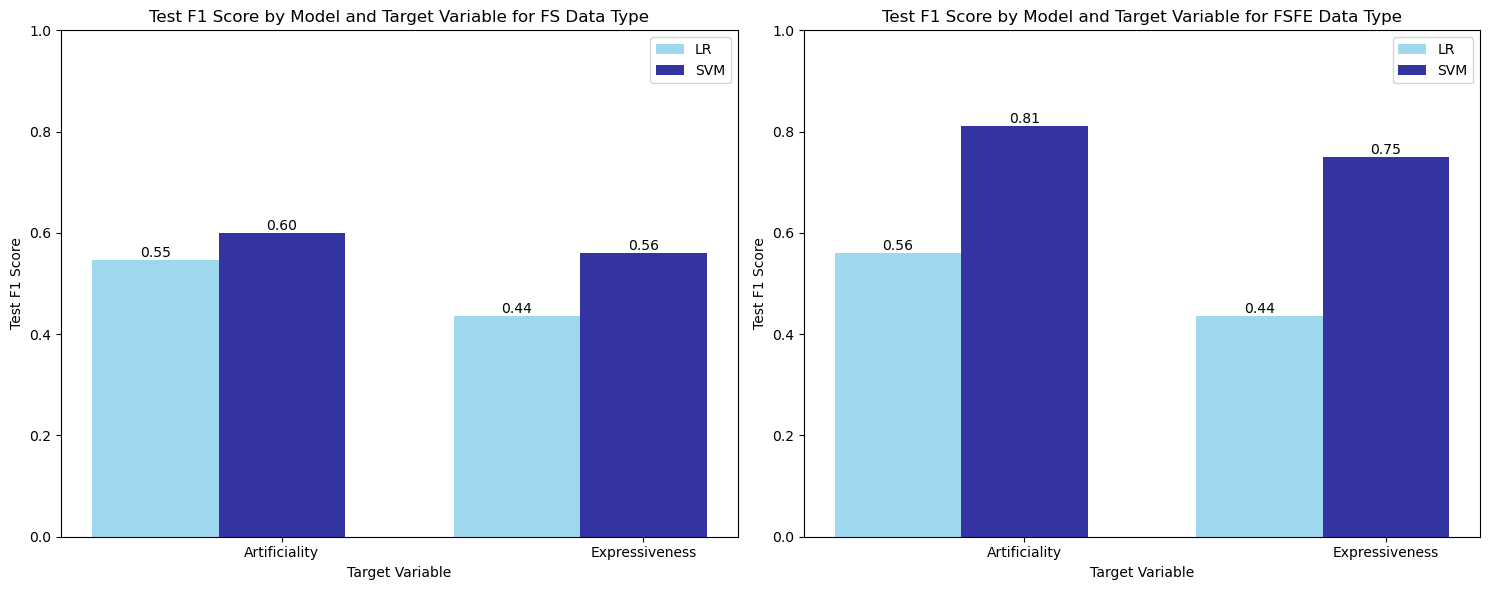

In [40]:
# Data from dictionaries
results = [
    {'Model': 'LR', 'Data_Type': 'FS', 'Target_Variable': 'Artificiality', 'F1_Test': 0.5465587044534412},
    {'Model': 'LR', 'Data_Type': 'FSFE', 'Target_Variable': 'Artificiality', 'F1_Test': 0.5607843137254902},
    {'Model': 'SVM', 'Data_Type': 'FS', 'Target_Variable': 'Artificiality', 'F1_Test': 0.6000000000000001},
    {'Model': 'SVM', 'Data_Type': 'FSFE', 'Target_Variable': 'Artificiality', 'F1_Test': 0.8117647058823529},
    {'Model': 'LR', 'Data_Type': 'FS', 'Target_Variable': 'Expressiveness', 'F1_Test': 0.43529411764705883},
    {'Model': 'LR', 'Data_Type': 'FSFE', 'Target_Variable': 'Expressiveness', 'F1_Test': 0.43529411764705883},
    {'Model': 'SVM', 'Data_Type': 'FS', 'Target_Variable': 'Expressiveness', 'F1_Test': 0.5607843137254902},
    {'Model': 'SVM', 'Data_Type': 'FSFE', 'Target_Variable': 'Expressiveness', 'F1_Test': 0.75}
]

# Define colors for each model
colors = {'LR': 'skyblue', 'SVM': 'darkblue'}

# Prepare the data for plotting
data_types = ['FS', 'FSFE']
target_variables = ['Artificiality', 'Expressiveness']
models = ['LR', 'SVM']

# Plot configuration
n_groups = len(target_variables)
index = range(n_groups)
bar_width = 0.35
opacity = 0.8

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

for data_type_idx, data_type in enumerate(data_types):
    for model_idx, model in enumerate(models):
        # For each model, each target_variable is plotted side by side for the current data_type
        f1_scores = []
        for target_var in target_variables:
            # Extract the F1 score for the current model, data_type, and target_variable
            f1_score = [d['F1_Test'] for d in results if d['Model'] == model and d['Data_Type'] == data_type and d['Target_Variable'] == target_var]
            if f1_score: 
                f1_scores.append(f1_score[0])
            else:
                f1_scores.append(0) 

        bars = axs[data_type_idx].bar([x + model_idx * bar_width for x in index], f1_scores, bar_width,
                                      alpha=opacity, color=colors[model],
                                      label=model)

        # Add the text label above the bar
        for bar in bars:
            height = bar.get_height()
            axs[data_type_idx].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set the properties for the plots
for ax, data_type in zip(axs, data_types):
    ax.set_xlabel('Target Variable')
    ax.set_ylabel('Test F1 Score')
    ax.set_title(f'Test F1 Score by Model and Target Variable for {data_type} Data Type')
    ax.set_xticks([r + bar_width for r in index])
    ax.set_xticklabels(target_variables)
    ax.legend()
    ax.set_ylim(0, 1.0)

# Show plot
plt.tight_layout()
plt.savefig('test_f1_scores_plot.png', bbox_inches='tight')
plt.show()

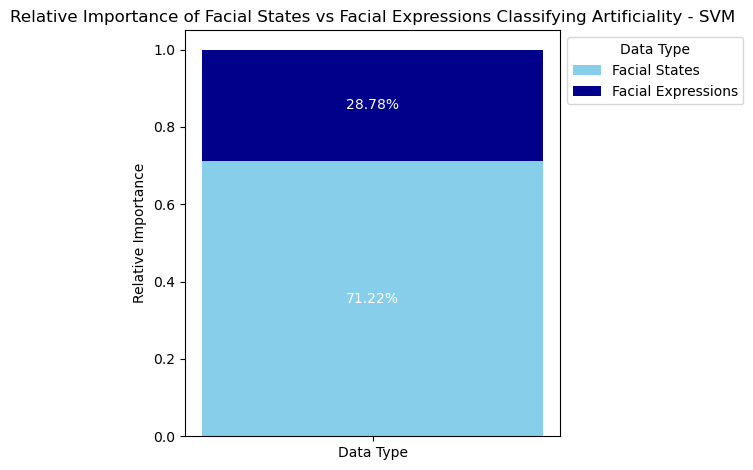

In [41]:
# Classify the features into Facial States and Facial Expressions
facial_states = ['Eye', 'Eyebrow', 'Mouth']
df = FSFE_Artificiality_Feature_Coefficients_SVC.copy()

# Add a new column for data type based on the presence of key words
df['Data Type'] = df['Feature'].apply(lambda x: 'Facial States' if any(word in x for word in facial_states) else 'Facial Expressions')

# Calculate the absolute sum of coefficients for each data type
Data_Type_sums = df.groupby('Data Type')['Coefficient'].sum().abs()

# Calculate the relative importance
total_sum = Data_Type_sums.sum()
relative_importance = Data_Type_sums / total_sum

# Create the bar plot
fig, ax = plt.subplots()

# Calculate proportions for each data type
states_proportion = relative_importance['Facial States']
expressions_proportion = relative_importance['Facial Expressions']

# Plot the bars
states_bar = ax.bar('Data Type', states_proportion, label='Facial States', color='skyblue')
expressions_bar = ax.bar('Data Type', expressions_proportion, bottom=states_proportion, label='Facial Expressions', color='darkblue')

# Adding the values on top of the bars
ax.text('Data Type', states_proportion / 2, f'{states_proportion:.2%}', ha='center', va='center', color='white')
ax.text('Data Type', states_proportion + expressions_proportion / 2, f'{expressions_proportion:.2%}', ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('Relative Importance')
ax.set_title('Relative Importance of Facial States vs Facial Expressions Classifying Artificiality - SVM')

# Move the legend outside of the plot on the upper left side
ax.legend(loc='upper left', bbox_to_anchor=(1,1), title='Data Type')

# Show plot
plt.tight_layout()
plt.savefig('Artificiality_relative_importance_plot.png', bbox_inches='tight')
plt.show()

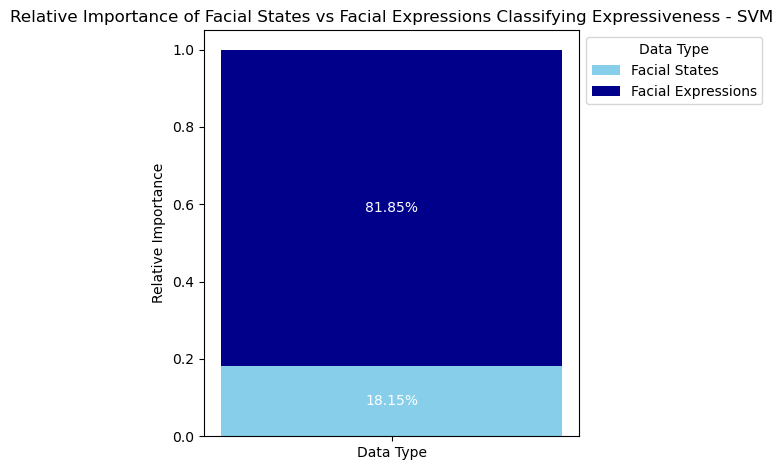

In [42]:
# Classify the features into Facial States and Facial Expressions
facial_states = ['Eye', 'Eyebrow', 'Mouth']
df = FSFE_Expressiveness_Feature_Coefficients_SVC.copy()

# Add a new column for data type based on the presence of key words
df['Data Type'] = df['Feature'].apply(lambda x: 'Facial States' if any(word in x for word in facial_states) else 'Facial Expressions')

# Calculate the absolute sum of coefficients for each data type
Data_Type_sums = df.groupby('Data Type')['Coefficient'].sum().abs()

# Calculate the relative importance
total_sum = Data_Type_sums.sum()
relative_importance = Data_Type_sums / total_sum

# Create the bar plot
fig, ax = plt.subplots()

# Calculate proportions for each data type
states_proportion = relative_importance['Facial States']
expressions_proportion = relative_importance['Facial Expressions']

# Plot the bars
states_bar = ax.bar('Data Type', states_proportion, label='Facial States', color='skyblue')
expressions_bar = ax.bar('Data Type', expressions_proportion, bottom=states_proportion, label='Facial Expressions', color='darkblue')

# Adding the values on top of the bars
ax.text('Data Type', states_proportion / 2, f'{states_proportion:.2%}', ha='center', va='center', color='white')
ax.text('Data Type', states_proportion + expressions_proportion / 2, f'{expressions_proportion:.2%}', ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('Relative Importance')
ax.set_title('Relative Importance of Facial States vs Facial Expressions Classifying Expressiveness - SVM')

# Move the legend outside of the plot on the upper left side
ax.legend(loc='upper left', bbox_to_anchor=(1,1), title='Data Type')

# Show plot
plt.tight_layout()
plt.savefig('Expressiveness_relative_importance_plot.png', bbox_inches='tight')
plt.show()